In [20]:
# importing the ML library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
# Importing DL library (tensorflow and keras)
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.6.0


In [22]:
# Importing Fashion MNIST Dataset
fashion_mnist = keras.datasets.fashion_mnist

In [23]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\Lenovo\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [24]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#assert x_train.shape == (60000, 28, 28)
#assert x_test.shape == (10000, 28, 28)
#assert y_train.shape == (60000,)
#assert y_test.shape == (10000,)

In [25]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [26]:

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

SyntaxError: invalid syntax (<ipython-input-26-4d97441e205d>, line 1)

In [27]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
              'Sneaker','Bag','Ankle boot']

In [28]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

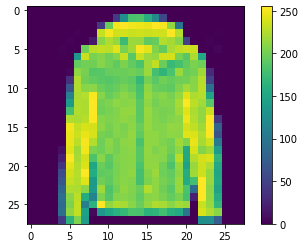

In [29]:
plt.figure()
plt.imshow(train_images[5000])
plt.colorbar()
plt.grid(False)
plt.show()

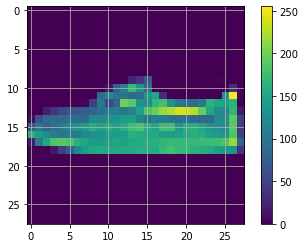

In [30]:
plt.figure()
plt.imshow(train_images[40000])
plt.colorbar()
plt.grid(True)
plt.show()

In [31]:
# Data-Preprocess : min-max apprach
# most popular on image - mandatory steps

train_images = train_images/255.0
test_images = test_images/255.0


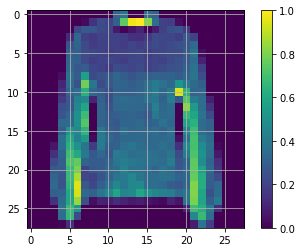

In [32]:
plt.figure()
plt.imshow(train_images[20500])
plt.colorbar()
plt.grid(True)
plt.show()

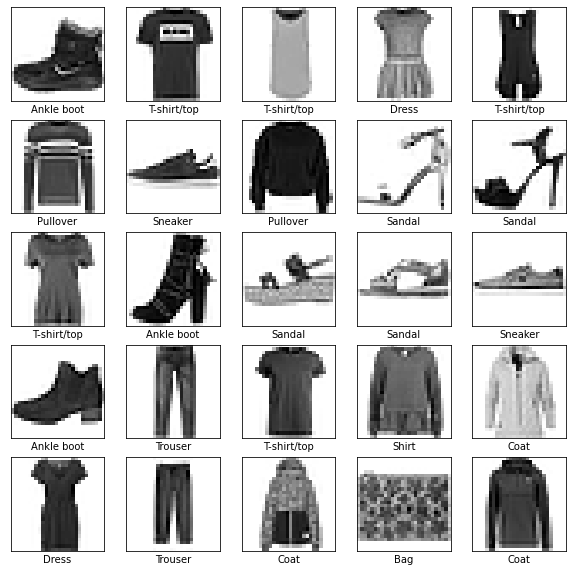

In [33]:
# Lets see few more images

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

In [34]:
# Now, building simple multilayer perceptron

In [35]:
tf.random.set_seed(100)
tf.keras.backend.clear_session()

model = None

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10) 
    
    
])

In [36]:
model

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer ='adam' , 
              loss=tf.keras.losses.SparseCategoricalCrossentropy
              (from_logits=True),metrics=['accuracy'])

In [48]:
# visualisation by using tensor-board

import os
import datetime

logdir = os.path.join('logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
print(logdir)

logs\20211103-220704


In [49]:
%load_ext tensorboard
%tensorboard --logdir $logdir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [46]:
tesorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.fit(train_images, train_labels, epochs=10, callbacks=[tesorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5007 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3802 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3397 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3145 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2958 - accuracy: 0.8894
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2817 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2669 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2478 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

In [50]:
# To check overfitting problem

test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(test_accuracy)

313/313 - 1s - loss: 0.3368 - accuracy: 0.8822
[0.33678096532821655, 0.8822000026702881]


In [51]:
tesorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.fit(train_images, train_labels, epochs=100, callbacks=[tesorboard_callback])

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2318 - accuracy: 0.9141
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2247 - accuracy: 0.9154
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2192 - accuracy: 0.9170
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2122 - accuracy: 0.9205
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2062 - accuracy: 0.9227
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2021 - accuracy: 0.9243
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1938 - accuracy: 0.9271
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1899 - accuracy: 0.9289
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1854 - accuracy: 0.9299: 0s - loss:
Epoch 10/100
1875/1875 [==============================] - 5s 